In [43]:
from SCTransform import SCTransform
#https://github.com/atarashansky/SCTransformPy
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [2]:
#adata = sc.datasets.pbmc3k()
datapath='input_vizgen_liver/alldata/'
ad_sc_full = sc.read_h5ad(datapath+'sc_liver_data.h5ad')
ad_sc_full

AnnData object with n_obs × n_vars = 185894 × 31053

In [3]:
ad_sp_full=sc.read(datapath+'Blank_genes_removed.csv').transpose()
ad_sp_full.var_names_make_unique()
ad_sp_full

AnnData object with n_obs × n_vars = 395215 × 347

In [5]:
sp_cellname=ad_sp_full.obs_names.to_numpy()
sp_genename=ad_sp_full.var_names.to_numpy()
sc_cellname=ad_sc_full.obs_names.to_numpy()
sc_genename=ad_sc_full.var_names.to_numpy()
print(len(sp_cellname),len(sp_genename))
print(len(sc_cellname),len(sc_genename))

395215 347
185894 31053


In [6]:
#find common genes 
index_sc=[]
index_sp=[]
d={}
for j in range(len(sc_genename)):
    name=sc_genename[j]
    d[name]=j
    
for i in range(len(sp_genename)):
    name=sp_genename[i]
    try: 
        d[name]
        flag=1
    except KeyError: 
        flag=0
    if flag==1:
        index_sc.append(d[name])
        index_sp.append(i)

print(len(index_sc),len(index_sp))

346 346


In [7]:
ad_sc=ad_sc_full[:,index_sc]
ad_sc

View of AnnData object with n_obs × n_vars = 185894 × 346

In [8]:
ad_sp=ad_sp_full[:,index_sp]
ad_sp

View of AnnData object with n_obs × n_vars = 395215 × 346

### UMAP analysis on basic normalization 

In [9]:
# Full single cell data 
sc.pp.normalize_total(ad_sc_full, inplace=True)
sc.pp.log1p(ad_sc_full)
sc.pp.highly_variable_genes(ad_sc_full, flavor="seurat", n_top_genes=2000)

In [11]:
sc.pp.pca(ad_sc_full)
sc.pp.neighbors(ad_sc_full,n_pcs=30)
sc.tl.umap(ad_sc_full)
sc.tl.leiden(ad_sc_full, key_added="leiden")

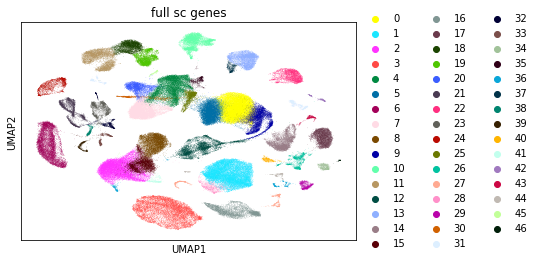

In [22]:
sc.pl.umap(ad_sc_full,color=['leiden'],title=["full sc genes"],wspace=0.2)

In [16]:
# single cell common genes 
sc.pp.normalize_total(ad_sc, inplace=True)
sc.pp.log1p(ad_sc)
sc.pp.pca(ad_sc)
sc.pp.neighbors(ad_sc,n_pcs=30)
sc.tl.umap(ad_sc)
sc.tl.leiden(ad_sc, key_added="leiden")

/Users/agrawal/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


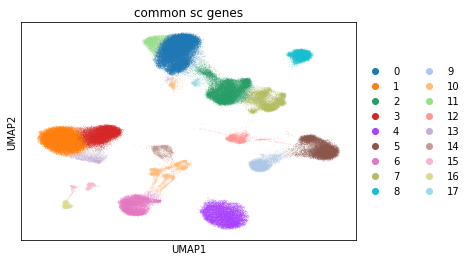

In [17]:
sc.pl.umap(ad_sc,color=['leiden'],title=["common sc genes"],wspace=0.2)

In [19]:
ad_sp

AnnData object with n_obs × n_vars = 395215 × 346
    uns: 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [20]:
sc.pp.filter_cells(ad_sp, min_counts=1)
ad_sp

AnnData object with n_obs × n_vars = 393878 × 346
    obs: 'n_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [21]:
# spatial cell common genes 
sc.pp.normalize_total(ad_sp, inplace=True)
sc.pp.log1p(ad_sp)
sc.pp.pca(ad_sp)
sc.pp.neighbors(ad_sp,n_pcs=30)
sc.tl.umap(ad_sp)
sc.tl.leiden(ad_sp, key_added="leiden")

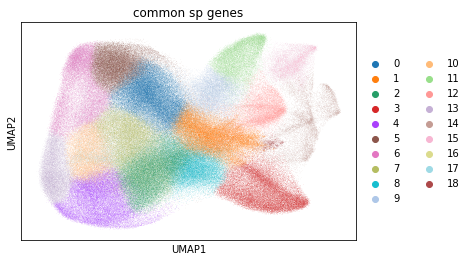

In [23]:
sc.pl.umap(ad_sp,color=['leiden'],title=["common sp genes"],wspace=0.2)

# SC Transform using python 

In [24]:
#performed on spatial cells common genes
sct_ad_sp = SCTransform(ad_sp,
                        min_cells=5,
                        gmean_eps=1,
                        n_genes=500,
                        n_cells=None, #use all cells
                        bin_size=500,
                        bw_adjust=3,
                        inplace=False)

In [25]:
#performed on common genes in single cells 
sct_ad_sc = SCTransform(ad_sc,
                        min_cells=5,
                        gmean_eps=1,
                        n_genes=500,
                        n_cells=None, #use all cells
                        bin_size=500,
                        bw_adjust=3,
                        inplace=False)

In [26]:
#performed on full genes in single cells 
sct_ad_sc_full = SCTransform(ad_sc_full,
                        min_cells=5,
                        gmean_eps=1,
                        n_genes=2000,
                        n_cells=None, #use all cells
                        bin_size=500,
                        bw_adjust=3,
                        inplace=False)

In [28]:
print(sct_ad_sp)
print(sct_ad_sc)
print(sct_ad_sc_full)
print('\n')
print(ad_sp)
print(ad_sc)
print(ad_sc_full)

AnnData object with n_obs × n_vars = 393878 × 346
    obs: 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct'
    var: 'Intercept_sct', 'log_umi_sct', 'theta_sct', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'genes_step1_sct', 'log10_gmean_sct'
AnnData object with n_obs × n_vars = 185894 × 335
    obs: 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct'
    var: 'Intercept_sct', 'log_umi_sct', 'theta_sct', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'genes_step1_sct', 'log10_gmean_sct'
AnnData object with n_obs × n_vars = 185894 × 22829
    obs: 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct'
    var: 'Intercept_sct', 'log_umi_sct', 'theta_sct', 'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct', 'genes_step1_sct', 'log10_gmean_sct'


AnnData object with n_obs × n_vars = 393878 × 346
 

In [29]:
sc.pp.pca(sct_ad_sp)
sc.pp.neighbors(sct_ad_sp,n_pcs=30)
sc.tl.umap(sct_ad_sp)
sc.tl.leiden(sct_ad_sp,resolution=1.0)

In [30]:
sc.pp.pca(sct_ad_sc)
sc.pp.neighbors(sct_ad_sc,n_pcs=30)
sc.tl.umap(sct_ad_sc)
sc.tl.leiden(sct_ad_sc,resolution=1.0)


In [31]:
sc.pp.pca(sct_ad_sc_full)
sc.pp.neighbors(sct_ad_sc_full,n_pcs=30)
sc.tl.umap(sct_ad_sc_full)
sc.tl.leiden(sct_ad_sc_full,resolution=1.0)

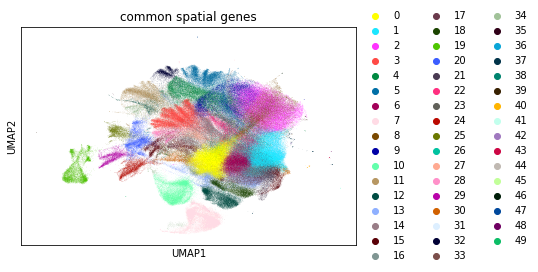

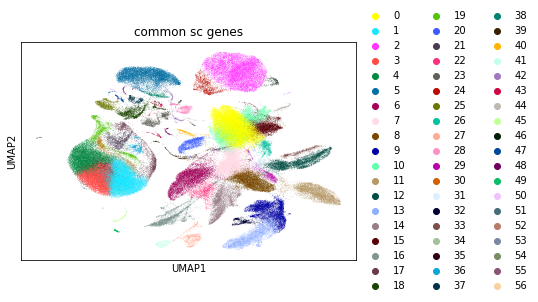

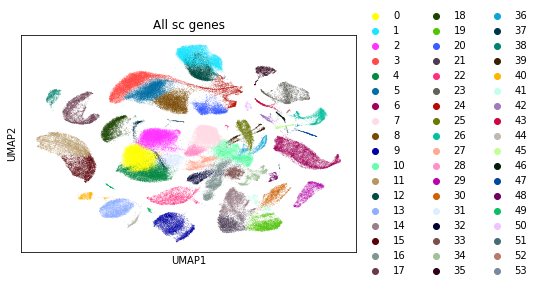

In [32]:
sc.pl.umap(sct_ad_sp,color=['leiden'],title=["common spatial genes"],wspace=0.2)
sc.pl.umap(sct_ad_sc,color=['leiden'],title=["common sc genes"],wspace=0.2)
sc.pl.umap(sct_ad_sc_full,color=['leiden'],title=["All sc genes"],wspace=0.2)

# Resolution 0.5 

In [33]:
sc.tl.leiden(sct_ad_sp,resolution=0.5,key_added="leid_5")
sc.tl.leiden(sct_ad_sc,resolution=0.5,key_added="leid_5")
sc.tl.leiden(sct_ad_sc_full,resolution=0.5,key_added="leid_5")

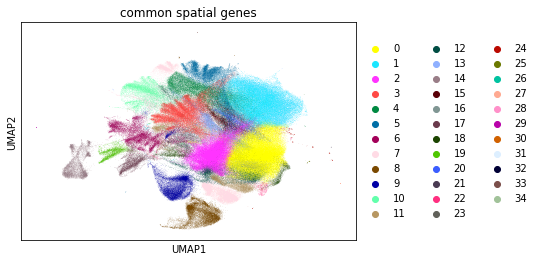

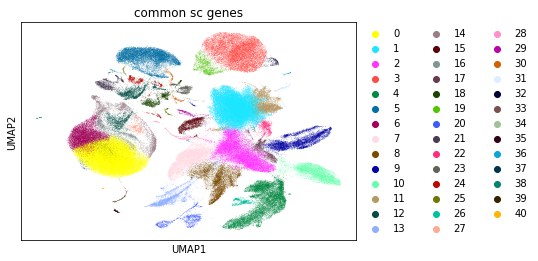

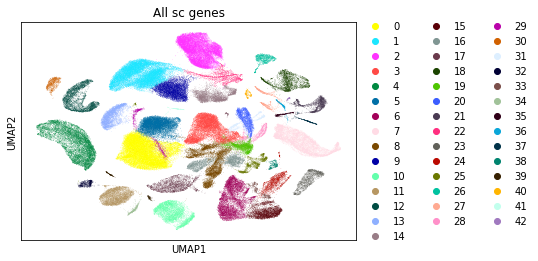

In [34]:
sc.pl.umap(sct_ad_sp,color=['leid_5'],title=["common spatial genes"],wspace=0.2)
sc.pl.umap(sct_ad_sc,color=['leid_5'],title=["common sc genes"],wspace=0.2)
sc.pl.umap(sct_ad_sc_full,color=['leid_5'],title=["All sc genes"],wspace=0.2)

# Resolution 0.25 

In [35]:
sc.tl.leiden(sct_ad_sp,resolution=0.25,key_added="leid_25")
sc.tl.leiden(sct_ad_sc,resolution=0.25,key_added="leid_25")
sc.tl.leiden(sct_ad_sc_full,resolution=0.25,key_added="leid_25")

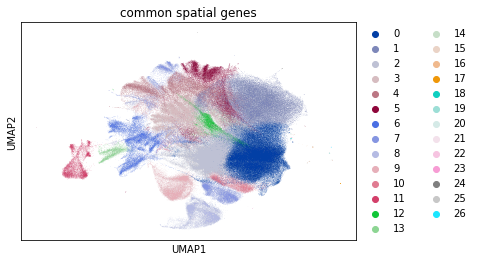

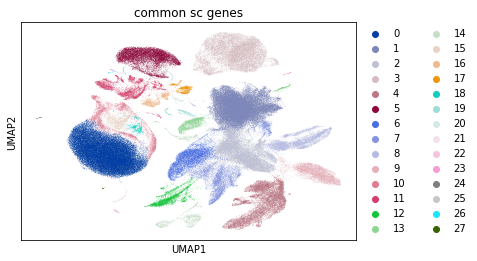

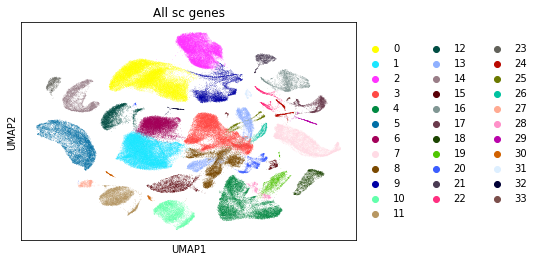

In [36]:
sc.pl.umap(sct_ad_sp,color=['leid_25'],title=["common spatial genes"],wspace=0.2)
sc.pl.umap(sct_ad_sc,color=['leid_25'],title=["common sc genes"],wspace=0.2)
sc.pl.umap(sct_ad_sc_full,color=['leid_25'],title=["All sc genes"],wspace=0.2)

In [38]:
sct_ad_sp.write_h5ad(datapath+'scTransform_spatial_common')
sct_ad_sc.write_h5ad(datapath+'scTransform_single_common')
sct_ad_sc_full.write_h5ad(datapath+'scTransform_single_all_genes')


In [41]:
sct_ad_sc.obsm['X_umap'].shape

(185894, 2)

# cell type annotation common sc genes 

In [69]:
ctname=pd.read_csv(datapath+'sc_NameOfCT.dat',sep='\t',index_col=None,header=None)
ctname=ctname.to_numpy()
new_cluster_names=[]

for i in range(len(ctname)):
    #print(ctname[i])
    new_cluster_names.append(str(ctname[i,0])+ctname[i,1])
    
print(new_cluster_names)

['0Kupffer cells', '1Endothelial cells', '2Endothelial cells', '3Kupffer cells', '4Endothelial cells', '5Kupffer cells', '6Monocytes & Monocyte-derived cells', '7Endothelial cells', '8Hepatocytes', '9pDCs', '10B cells', '11T cells', '12cDC1s', '13Endothelial cells', '14Hepatocytes', '15Kupffer cells', '16cDC2s', '17Endothelial cells', '18Fibroblasts', '19Neutrophils', '20Monocytes & Monocyte-derived cells', '21T cells', '22Hepatocytes', '23Kupffer cells', '24Monocytes & Monocyte-derived cells', '25Monocytes & Monocyte-derived cells', '26ILC1s', '27Hepatocytes', '28Hepatocytes', '29Hepatocytes', '30Monocytes & Monocyte-derived cells', '31NK cells', '32Hepatocytes', '33Endothelial cells', '34Cholangiocytes', '35Hepatocytes', '36T cells', '37Monocytes & Monocyte-derived cells', '38Fibroblasts', '39Mig. cDCs', '40Endothelial cells', '41Fibroblasts', '42HsPCs']


In [47]:
df=pd.read_csv(datapath+'annot_mouseStStAll.csv')
data=df.to_numpy()
barcode={}
for i in range(len(data)):
    name=data[i,5]
    clusterid=data[i,2]
    barcode[name]=clusterid

In [49]:
cellname_common=sct_ad_sc.obs_names.to_numpy()
genename_common=sct_ad_sc.var_names.to_numpy()
cellname_all=sct_ad_sc_full.obs_names.to_numpy()
genename_all=sct_ad_sc_full.var_names.to_numpy()
print(len(cellname_common),len(genename_common),len(cellname_all),len(genename_all))

185894 335 185894 22829


In [51]:
def clusterKnownByAuthors(cellname,barcode):
    knownCluster=[]
    for i in range(len(cellname)):
        name=cellname[i]
        knownCluster.append(barcode[name])
    knownCluster=np.array(knownCluster)
    return knownCluster

/Users/agrawal/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'knownClusters' as categorical


43 43


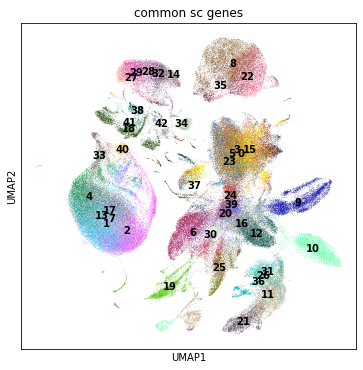

In [74]:
clu=clusterKnownByAuthors(cellname_common,barcode)
sct_ad_sc.obs['knownClusters'] = clu.astype(str)
print(len(np.unique(clu)),len(new_cluster_names))
plt.rcParams["figure.figsize"] = (6, 6)
sc.pl.umap(sct_ad_sc, color='knownClusters',legend_loc='on data', title='common sc genes', frameon=True,
           show=True, save='new_leiden2.png')


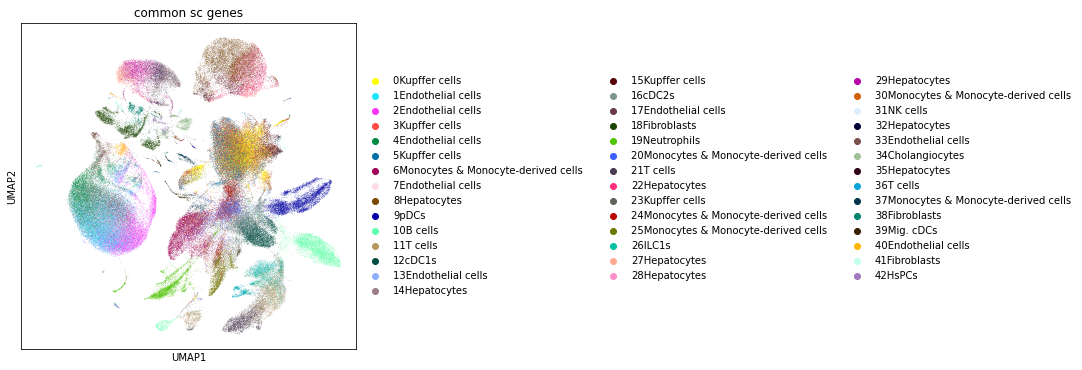

In [75]:
sct_ad_sc.obs['knownClusters']=  sct_ad_sc.obs['knownClusters'].astype('category')
sct_ad_sc.obs['knownClusters'] = sct_ad_sc.obs['knownClusters'].cat.rename_categories(new_cluster_names)

sc.pl.umap(sct_ad_sc, color="knownClusters",title='common sc genes',show=True,save='_spatial_known_clusters.png')

# cell type annotation full sc genes 

/Users/agrawal/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'knownClusters' as categorical


43 43


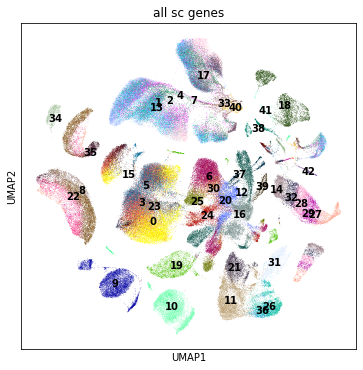

In [77]:
clu=clusterKnownByAuthors(cellname_all,barcode)
sct_ad_sc_full.obs['knownClusters'] = clu.astype(str)
print(len(np.unique(clu)),len(new_cluster_names))
plt.rcParams["figure.figsize"] = (6, 6)
sc.pl.umap(sct_ad_sc_full, color='knownClusters',legend_loc='on data', title='all sc genes', frameon=True,
           show=True, save='new_leiden2.png')


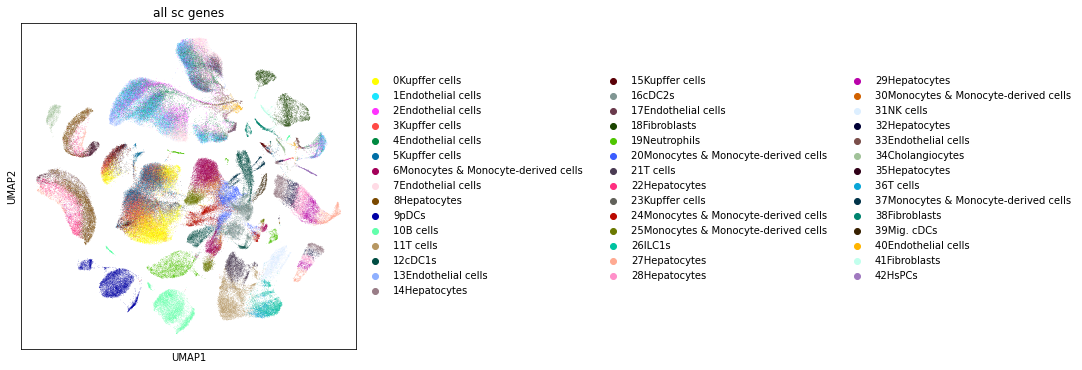

In [78]:
sct_ad_sc_full.obs['knownClusters']=  sct_ad_sc_full.obs['knownClusters'].astype('category')
sct_ad_sc_full.obs['knownClusters'] = sct_ad_sc_full.obs['knownClusters'].cat.rename_categories(new_cluster_names)

sc.pl.umap(sct_ad_sc_full, color="knownClusters",title='all sc genes',show=True,save='_spatial_known_clusters.png')

# cell type annotation in basic normalization 

In [79]:
basic_cellname_common=ad_sc.obs_names.to_numpy()
basic_genename_common=ad_sc.var_names.to_numpy()
basic_cellname_all=ad_sc_full.obs_names.to_numpy()
basic_genename_all=ad_sc_full.var_names.to_numpy()
print(len(basic_cellname_common),len(basic_genename_common),len(basic_cellname_all),len(basic_genename_all))

185894 346 185894 31053


/Users/agrawal/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'knownClusters' as categorical


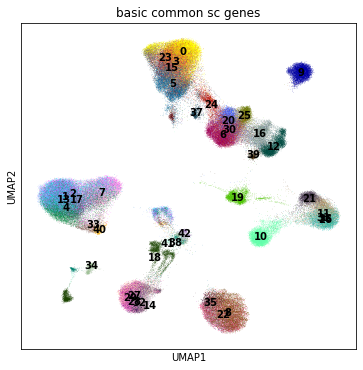

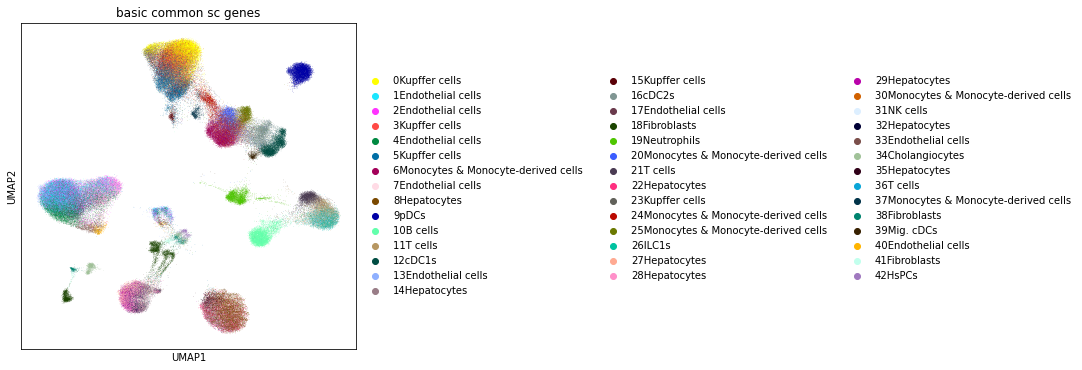

In [80]:
clu=clusterKnownByAuthors(basic_cellname_common,barcode)
ad_sc.obs['knownClusters'] = clu.astype(str)
plt.rcParams["figure.figsize"] = (6, 6)
sc.pl.umap(ad_sc, color='knownClusters',legend_loc='on data', title='basic common sc genes', frameon=True,
           show=True, save='new_leiden2.png')

ad_sc.obs['knownClusters']=  ad_sc.obs['knownClusters'].astype('category')
ad_sc.obs['knownClusters'] = ad_sc.obs['knownClusters'].cat.rename_categories(new_cluster_names)

sc.pl.umap(ad_sc, color="knownClusters",title='basic common sc genes',show=True,save='_spatial_known_clusters.png')

/Users/agrawal/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'knownClusters' as categorical


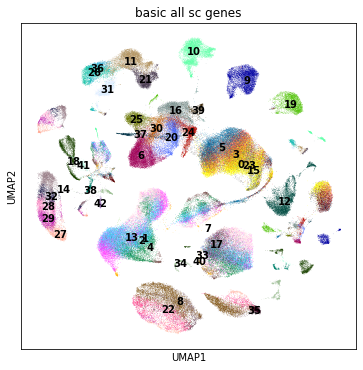

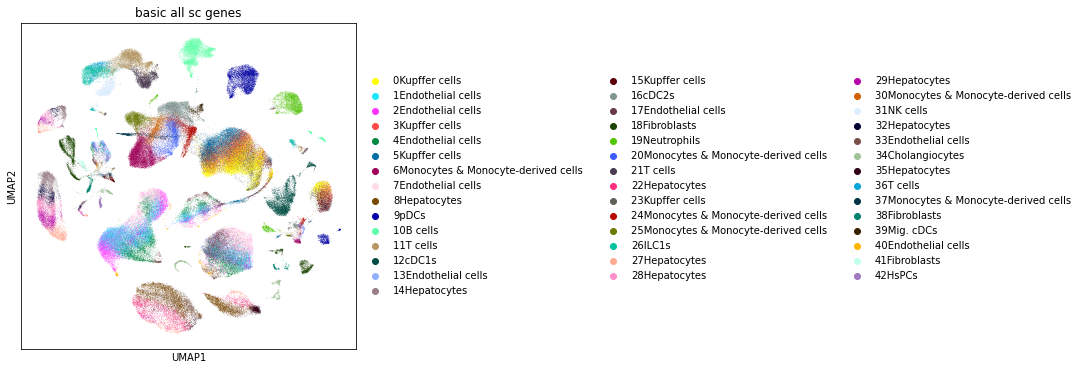

In [81]:
clu=clusterKnownByAuthors(basic_cellname_all,barcode)
ad_sc_full.obs['knownClusters'] = clu.astype(str)
plt.rcParams["figure.figsize"] = (6, 6)
sc.pl.umap(ad_sc_full, color='knownClusters',legend_loc='on data', title='basic all sc genes', frameon=True,
           show=True, save='new_leiden2.png')

ad_sc_full.obs['knownClusters']=  ad_sc_full.obs['knownClusters'].astype('category')
ad_sc_full.obs['knownClusters'] = ad_sc_full.obs['knownClusters'].cat.rename_categories(new_cluster_names)

sc.pl.umap(ad_sc_full, color="knownClusters",title='basic all sc genes',
           show=True,save='_spatial_known_clusters.png')